## Boston House Prices

***

### Introduction

Dataset Sources:

https://archive.ics.uci.edu/ml/machine-learning-databases/housing/

https://www.kaggle.com/prasadperera/the-boston-housing-dataset

The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. There are 506 line items and 13 attributes (excluding price). The following describes the dataset columns:

+ CRIM - per capita crime rate by town
+ ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
+ INDUS - proportion of non-retail business acres per town.
+ CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
+ NOX - nitric oxides concentration (parts per 10 million)
+ RM - average number of rooms per dwelling
+ AGE - proportion of owner-occupied units built prior to 1940
+ DIS - weighted distances to five Boston employment centres
+ RAD - index of accessibility to radial highways
+ TAX - full-value property-tax rate per 10,000
+ PTRATIO pupil-teacher ratio by town.
+ B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.
+ LSTAT - % lower status of the population.
+ MEDV - Median value of owner-occupied homes in 1000's.


In [4]:
# import libraries that will be used in completing this assignment
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import scipy.stats as ss # used for Inferential Stats - e.g - T-test
import pandas as pd
import seaborn as sns #plotting#
%matplotlib inline


In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

The Boston House prices dataset is imported directly from sklearn library; referenced in multiple locations as a source, and converted to a pandas dataframe for ease of analysis.
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html

In [6]:
from sklearn.datasets import load_boston
boston_dataset = load_boston() #storing Boston House prices as a variable boston_dataset (a dictionary)

In [7]:
df = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
print(boston_dataset.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR'])


https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155

+ data: contains the information for various houses
+ target: prices of the house
+ feature_names: names of the features
+ DESCR: describes the dataset

In [8]:
df.shape

(506, 13)

In [9]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


The dataset shows 506 line items, 13 columns. The prices column does not appear as this is in the "target" column, needs to be added to the dataset as this is obviously the most important data element! https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155 is heavily referenced to get this inital dataset into the dataframe required.

In [10]:
df['MEDV'] = boston_dataset.target

In [11]:
df.head() 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


MEDV - (Median value of owner-occupied homes in $1000's) is the key value in the dataset; against which other variablesa re to be measured against for "best fit". The aim here is to explore the dataset for close alignment of varaibles which can demonstrate a relationship to the House price.

In [12]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [29]:
df2.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000,490.00000,490.000000,490.000000,490.000000,490.000000,490.000000,490.00000,490.000000
mean,3.622833,11.112245,11.113143,0.059184,0.554307,6.245471,68.27898,3.834519,9.514286,408.002041,18.520000,355.855449,12.92402,21.635918
std,8.717373,22.844626,6.821302,0.236209,0.116688,0.653147,28.16479,2.109948,8.691297,168.065190,2.110478,92.634273,7.08318,7.865301
min,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,2.90000,1.137000,1.000000,187.000000,12.600000,0.320000,1.98000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.881000,44.55000,2.111050,4.000000,280.250000,17.400000,375.912500,7.34750,16.700000
50%,0.247510,0.000000,9.690000,0.000000,0.538000,6.185000,76.80000,3.275900,5.000000,330.000000,19.100000,391.770000,11.67500,20.900000
75%,3.560262,12.500000,18.100000,0.000000,0.624000,6.578000,93.87500,5.214600,24.000000,666.000000,20.200000,396.322500,17.11750,24.675000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.00000,12.126500,24.000000,711.000000,22.000000,396.900000,37.97000,48.800000


In [13]:
df.MEDV.describe() # summary of house prices

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: MEDV, dtype: float64


## Visualising the Dataset


### Histograms

From the dataset, Histograms are pointing to a subset of variables which display a relatively strong normal distribution - nmaely the MEDV, RM and LSTAT. These three alone also raise a dilemma in themselves. There would be a Normal ditribution on MEDV (Prices) if not for the 16 vlues at 50. This of inself raises the question of Outliers and should we exclude them from future analysis... Will deal with that dileema later as not overly important at Descriptive stage.

Th Histogrms of the 14 variables set out above throw up a diverse spread in the distributions - a minority of the dataset show anything resembling a normal distribution (MEDV, RM, LSTAT), while most are heavily shewed in a particular direction. MEDV is the house price variable we are working to create a model to predict.

here distplot is able to combine a histogram with a kernel density estimation (KDE) plot (it looks like a smoothed histogram) into a single plot. https://seaborn.pydata.org/generated/seaborn.distplot.html

In [59]:
# the dataframe with 16 outlier MEDV (price) values excluded
df2 = (df[df.MEDV != 50])

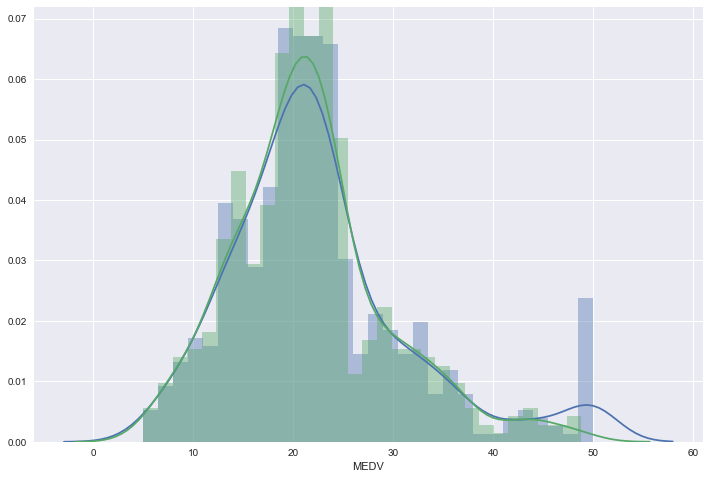

In [60]:
# Just to show a comparison of the means etc. when the oultier Prices are ommitted and their relative impact..
sns.set(rc={'figure.figsize':(12,8)})
sns.distplot(df['MEDV'], bins=30)
sns.distplot(df2['MEDV'], bins=30)
plt.show();

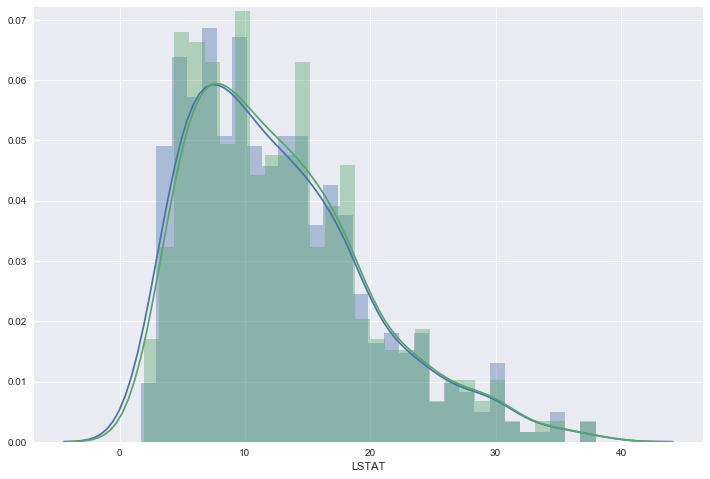

In [61]:
sns.set(rc={'figure.figsize':(12,8)})
sns.distplot(df['LSTAT'], bins=30)
sns.distplot(df2['LSTAT'], bins=30)
plt.show();

## Scatterplots
Given that the Histograms display heavily skewed data for most variables the next step is to examine the relationship between those variables that have reasonably normal curves against MEDV - The Price we ultimately want to see the correlations to.

Also of note as called out are the number of rooms which unsurprisingly show a positive relationship to price, whereas social class/status shows a downward trajectory. seaborn regplot allows us to plot the relationship between two variables in a DataFrame.

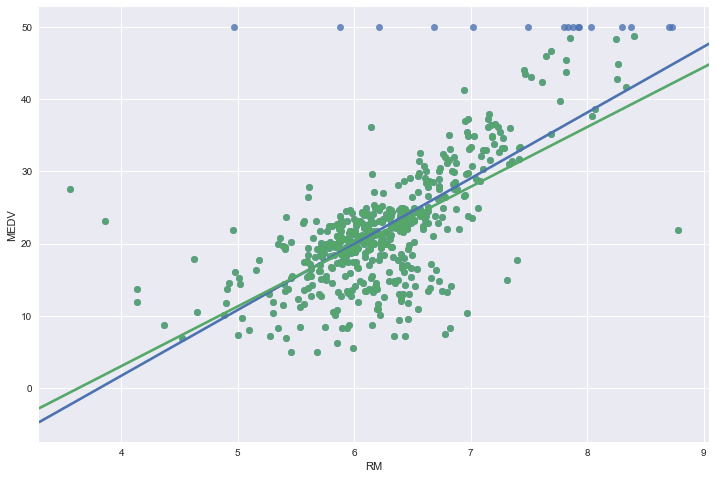

In [84]:
# Adapted from http://seaborn.pydata.org/generated/seaborn.regplot.html
# The confidence interval is estimated using a bootstrap; for large datasets, it may be advisable to avoid that computation by setting this parameter to None.

sns.set(rc={'figure.figsize':(12,8)})
sns.regplot(x='RM', y='MEDV',data=df, ci=None)  
sns.regplot(x='RM', y='MEDV',data=df2, ci=None)  

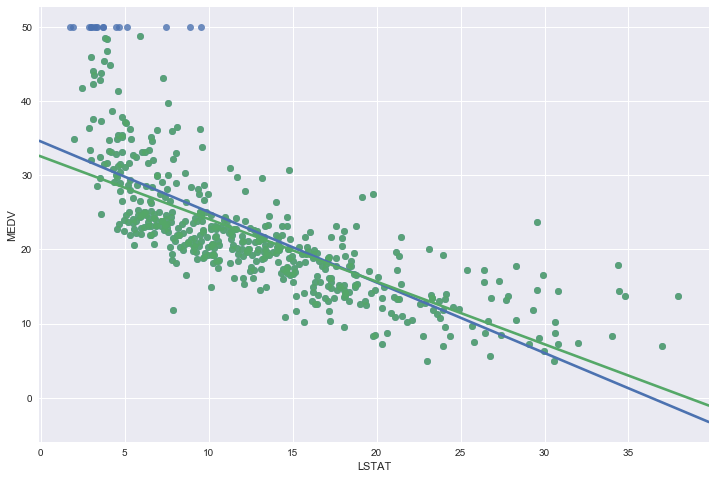

In [79]:

sns.set(rc={'figure.figsize':(12,8)})
sns.regplot(x='LSTAT', y='MEDV',data=df, ci=None) 
sns.regplot(x='LSTAT', y='MEDV',data=df2, ci=None)

### Correlation 
Correlation is a statistical technique that can show whether and how strongly pairs of variables are related...Correlation works for quantifiable data in which numbers are meaningful, usually quantities of some sort.

The main result of a correlation is called the #### correlation coefficient (or "r"). It ranges from -1.0 to +1.0. The closer r is to +1 or -1, the more closely the two variables are related.

If r is close to 0, it means there is no relationship between the variables. If r is positive, it means that as one variable gets larger the other gets larger. If r is negative it means that as one gets larger, the other gets smaller (often called an "inverse" correlation). https://www.surveysystem.com/correlation.htm. 

In short
1 - Positively correlated
-1 - Negatively correlated.
0 - Not correlated.

In [13]:
 df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.199458,0.404471,-0.055295,0.417521,-0.219940,0.350784,-0.377904,0.622029,0.579564,0.288250,-0.377365,0.452220,-0.385832
ZN,-0.199458,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.404471,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055295,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.417521,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219940,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.350784,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.377904,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.622029,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.579564,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


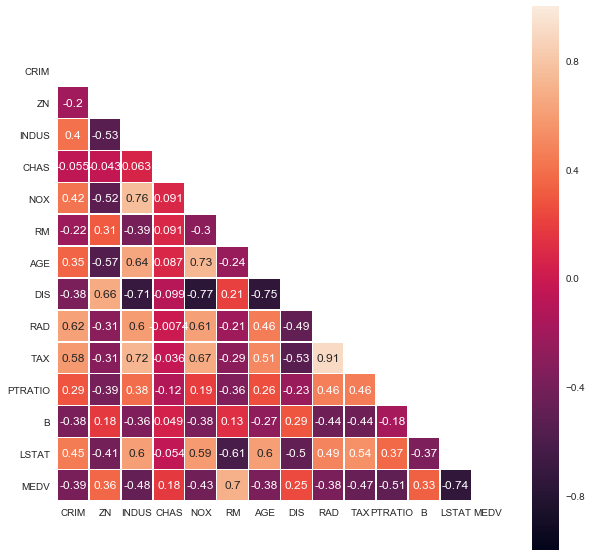

In [85]:
    # Adapted from https://seaborn.pydata.org/generated/seaborn.heatmap.html
    
     
    plt.figure(figsize=(10, 10))
     #ax = sns.heatmap(df.corr())
    mask = np.zeros_like(df.corr())
    mask[np.triu_indices_from(mask)] = True
    with sns.axes_style("white"):
        ax = sns.heatmap(df.corr(), mask=mask,linewidths=.5, vmin=-1,vmax=1, square=True,annot=True)
       

https://subscription.packtpub.com/book/programming/9781789804744/1/ch01lvl1sec11/our-first-analysis-the-boston-housing-dataset

df.corr() provides data on the above table with the correlation between each set of values. Large positive scores indicate a strong positive correlation

We want to see the features the dictate what is driving the MEDV. The correlation matrix measures the linear relationships between the variables... shown in the table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. 

From the correlogram above, we can clearly see that ZN,RM,DIS and B have positive correlation with MEDV and LSTAT has a paticularly strong negative correlation. Through a visual review of the scatterplot some variables have been discarded as there does not appear to be a significant viual reltionship between the datasets.

The most striking VISUAL relationships between Price and other variables look like LSTAT (downwards curve), RM almost linear with some outliers, NOX concentrated at lower prices?

### Summary: I think by now we have established the key drivers in price determination... now to prove it!

***

# Part 2: Inferential Statistics... down by the River

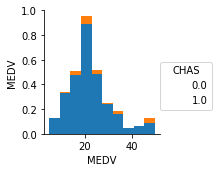

In [18]:
sns.pairplot(df,vars = ['MEDV'],hue = 'CHAS')

From a cursory view of the data, the house prices along the Charles river are generally higher.

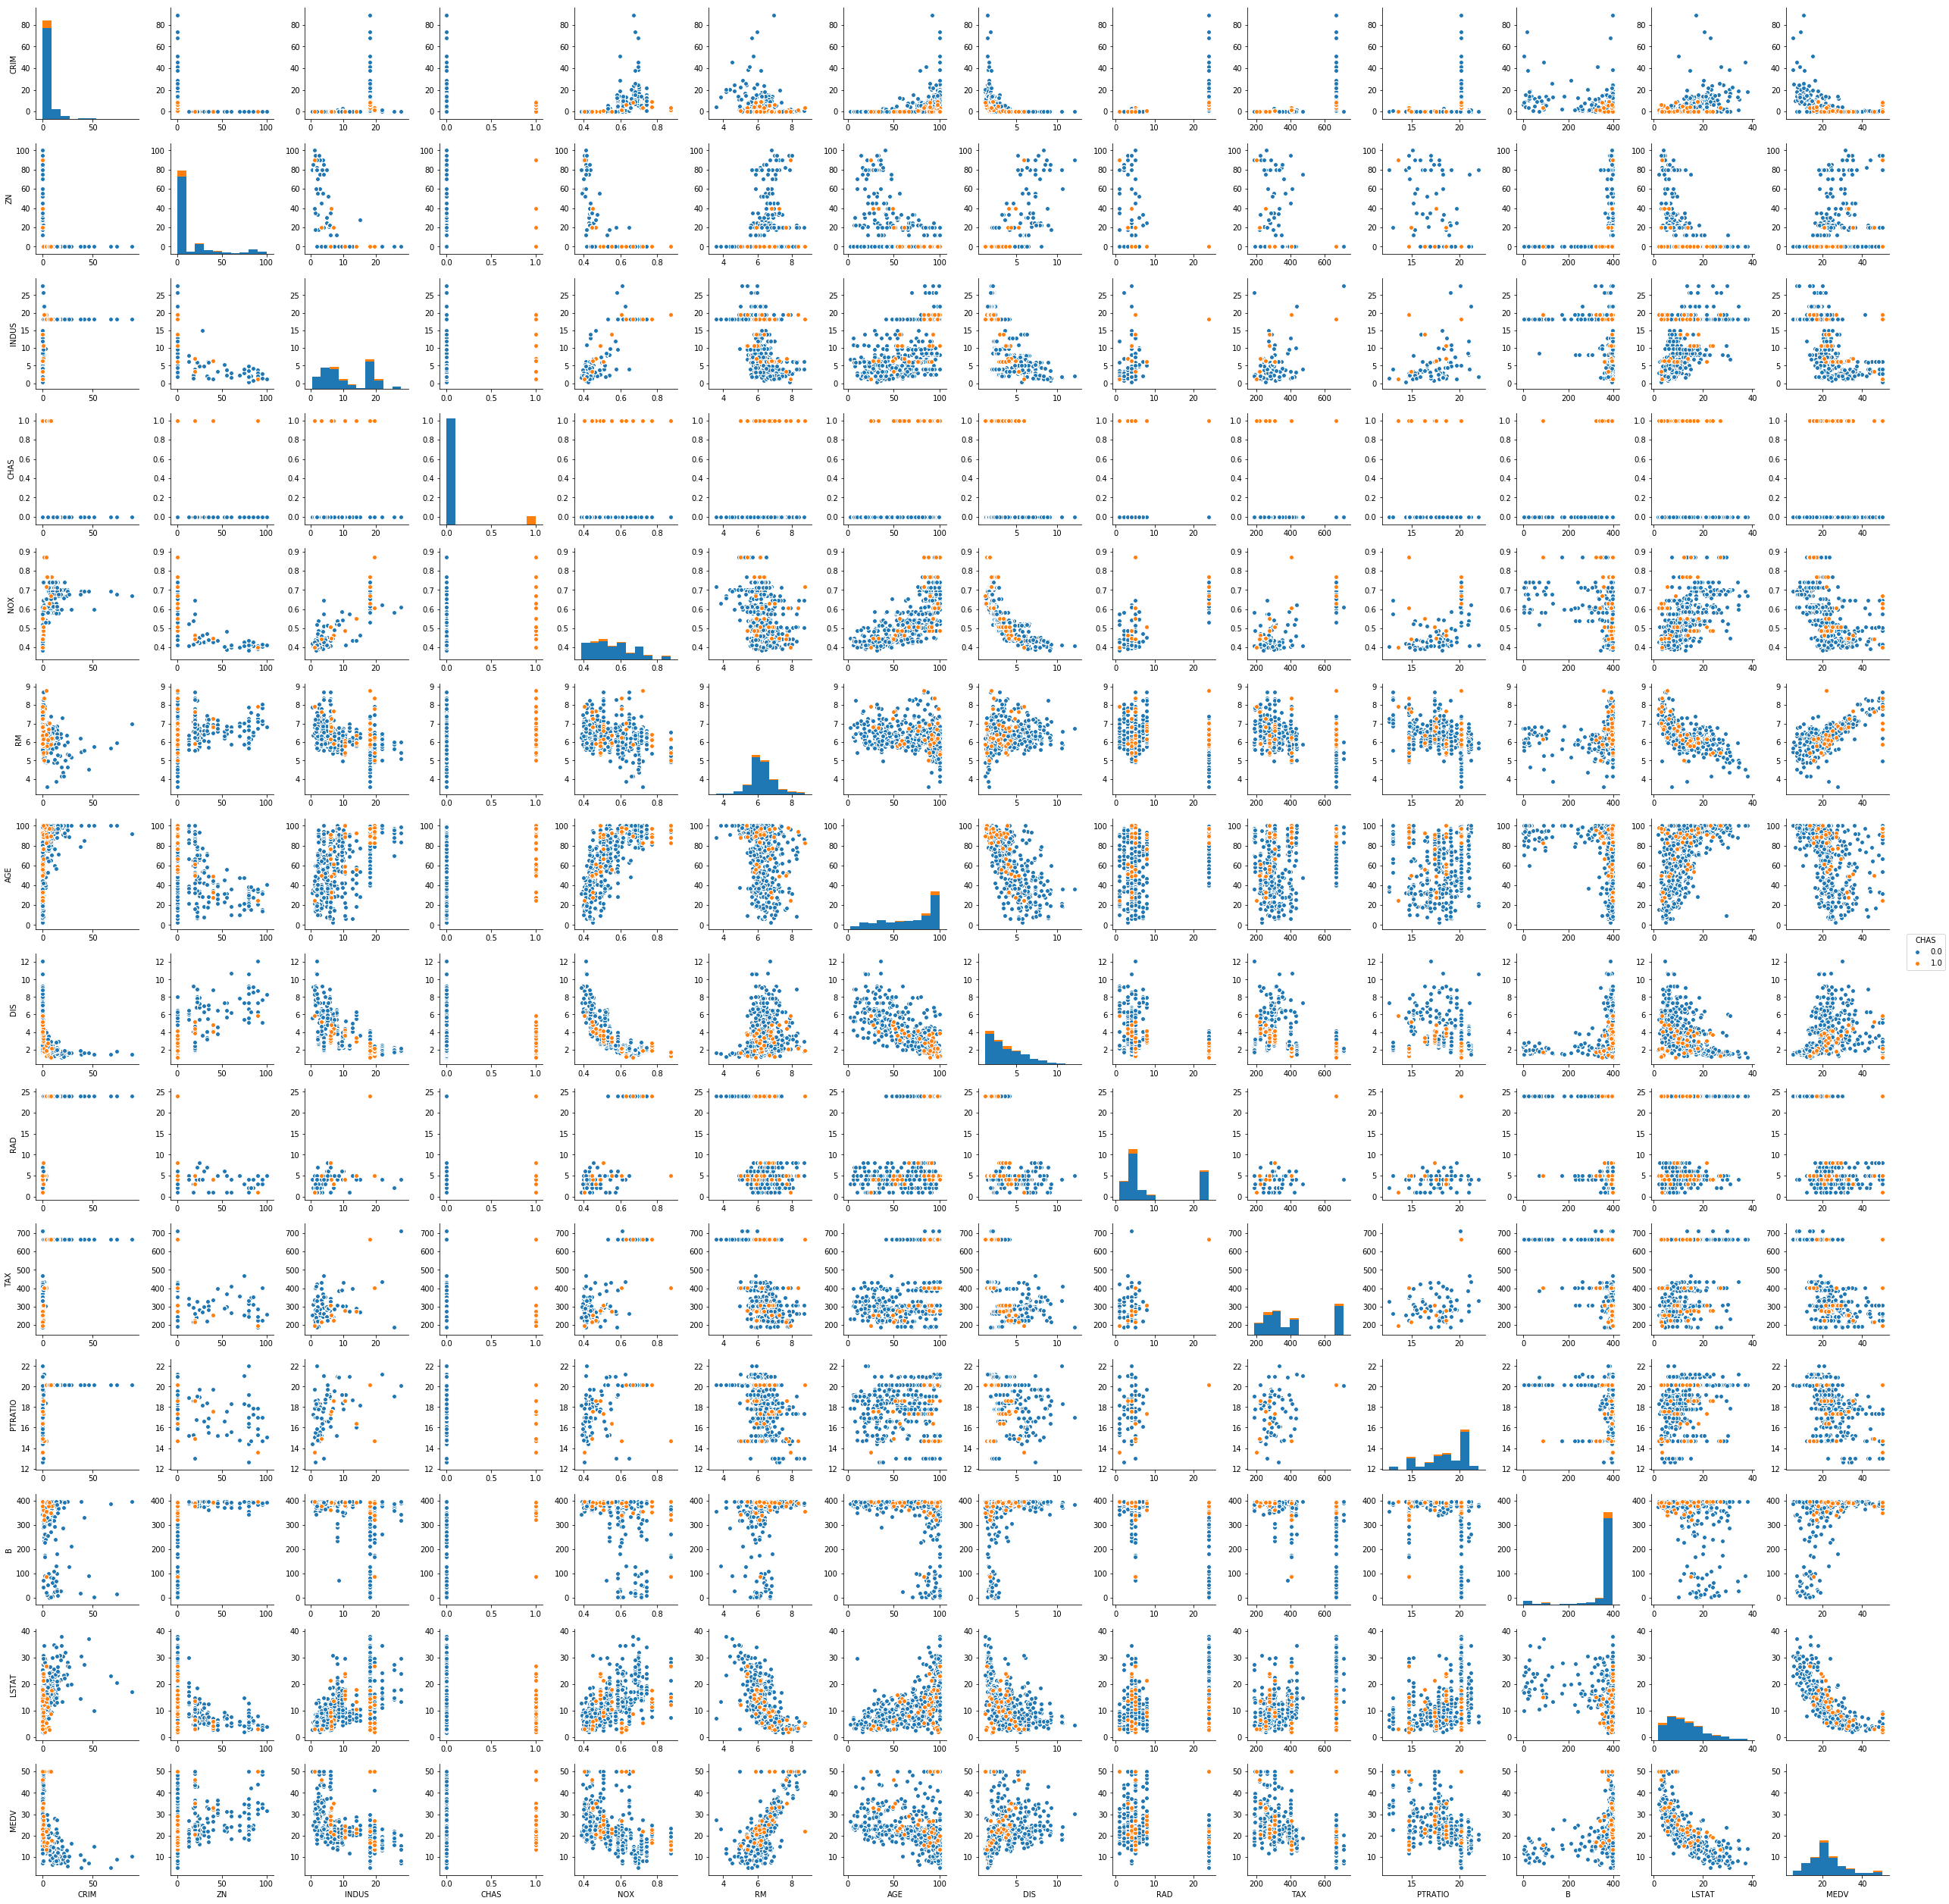

In [19]:
sns.pairplot(df, hue = "CHAS")

https://subscription.packtpub.com/book/programming/9781789804744/1/ch01lvl1sec11/our-first-analysis-the-boston-housing-dataset

## boxpolts for outliers

## What to do with all this Data?

Linear regression is one of the fundamental statistical and machine learning techniques. Whether you want to do statistics, machine learning, or scientific computing, there are good chances that you’ll need it. It’s advisable to learn it first and then proceed towards more complex methods.
https://realpython.com/linear-regression-in-python/


Through the use of Regression analysis the aim is to determine the relation

https://realpython.com/linear-regression-in-python/#what-is-regression
"Regression searches for relationships among variables.
For example, you can observe several employees of some company and try to understand how their salaries depend on the features, such as experience, level of education, role, city they work in, and so on.
This is a regression problem where data related to each employee represent one observation. The presumption is that the experience, education, role, and city are the independent features, while the salary depends on them.
Similarly, you can try to establish a mathematical dependence of the prices of houses on their areas, numbers of bedrooms, distances to the city center, and so on.
Generally, in regression analysis, you usually consider some phenomenon of interest and have a number of observations. Each observation has two or more features. Following the assumption that (at least) one of the features depends on the others, you try to establish a relation among them."
In other words, you need to find a function that maps some features or variables to others sufficiently well.
The dependent features are called the dependent variables, outputs, or responses.
The independent features are called the independent variables, inputs, or predictors.
Regression problems usually have one continuous and unbounded dependent variable. The inputs, however, can be continuous, discrete, or even categorical data such as gender, nationality, brand, and so on.
It is a common practice to denote the outputs with 𝑦 and inputs with 𝑥. If there are two or more independent variables, they can be represented as the vector 𝐱 = (𝑥₁, …, 𝑥ᵣ), where 𝑟 is the number of inputs."

https://towardsdatascience.com/a-beginners-guide-to-linear-regression-in-python-with-scikit-learn-83a8f7ae2b4f ... refer to this

There are two types of supervised machine learning algorithms: Regression and classification. The former predicts continuous value outputs while the latter predicts discrete outputs. For instance, predicting the price of a house in dollars is a regression problem whereas predicting whether a tumor is malignant or benign is a classification problem.

Linear Regression Theory
The term “linearity” in algebra refers to a linear relationship between two or more variables. If we draw this relationship in a two-dimensional space (between two variables), we get a straight line.
Linear regression performs the task to predict a dependent variable value (y) based on a given independent variable (x). So, this regression technique finds out a linear relationship between x (input) and y(output). Hence, the name is Linear Regression. If we plot the independent variable (x) on the x-axis and dependent variable (y) on the y-axis, linear regression gives us a straight line that best fits the data points, as shown in the figure below.

This same concept can be extended to cases where there are more than two variables. This is called multiple linear regression. For instance, consider a scenario where you have to predict the price of the house based upon its area, number of bedrooms, the average income of the people in the area, the age of the house, and so on. In this case, the dependent variable(target variable) is dependent upon several independent variables. A regression model involving multiple variables can be represented as:
y = b0 + m1b1 + m2b2 + m3b3 + … … mnbn
This is the equation of a hyperplane. Remember, a linear regression model in two dimensions is a straight line; in three dimensions it is a plane, and in more than three dimensions, a hyperplane.

## An analysis/comparison of median house prices between houses that are along the Charles river and those that aren’t using Inferential Statistics...

"Inferential statistics: statistics used to interpret the meaning of descriptive statistics... descriptive statistics, are specifically used to describe or summarize numeric observations, referred to as data. " https://uk.sagepub.com/sites/default/files/upm-binaries/40006_Chapter1.pdf

The basis of comparison of the sample of Boston House prices above in the Boston DAtaset. The key in Inferential Statistics is that we need to generalize for the Population based on a sample of data. The primary tools to be used will be T-Test and ANOVA. Python provides a number od tools to quickly calculate the variances in Means betwenn the two samples.

Here the objective is the compare/contrast House price trends in Boston based on their proximity to the Charles river. 

In [20]:
df['MEDV'].groupby([df['CHAS']]).describe() #summary of house prices by Charles v Non Charles 

,count,mean,std,min,25%,50%,75%,max
CHAS,,,,,,,,
0.0,471.0,22.093843,8.831362,5.0,16.6,20.9,24.80,50.0
1.0,35.0,28.440000,11.816643,13.4,21.1,23.3,33.15,50.0


Clearly onevery band from mean /min / max the house prices allow the Charles river are generally higher.

## T- Test

To do a deeper dive into the dataset we measure further and begin to use inferential statistics to determine a hypothesis for a poplulation based on measures of sample data. The independent t-test, is an inferential statistical test that determines whether there is a statistically significant difference between the means in two unrelated groups.There are 6 assumptions which must be met before the t-test is see as an approprite measure to test the Hypothesis as called out by Laerd Statistics. https://statistics.laerd.com/statistical-guides/independent-t-test-statistical-guide.php

In [21]:
# Separating out Houses by the River from not by the river...
river= df.loc[df["CHAS"]==[1],["MEDV"]]
nonriver =df.loc[df["CHAS"]==[0],["MEDV"]]


In [22]:
# t-test to compare the 2 data samples
ss.ttest_ind(river,nonriver)

Ttest_indResult(statistic=array([3.99643747]), pvalue=array([7.39062317e-05]))

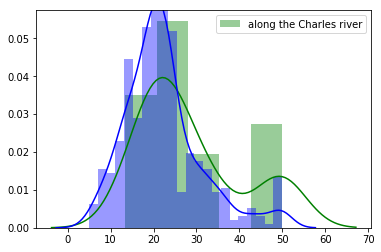

In [23]:
sns.distplot(river, color="g",label= "along the Charles river")
sns.distplot(nonriver, color="b")
plt.legend()

# What to do with the outliers????
# small sample size for river?

The t-test returns 2 data measures

 - T-Statistic
 The test statistic is a t statistic (t) defined by the following equation.
 
$$t = [ (x_{1} - x_{2}) - d ] / SE$$

where x<sub>1</sub> is the mean of sample 1, x<sub>2</sub> is the mean of sample 2, d is the hypothesized difference between population means, and SE is the standard error.

- Standard error. (for the sake of completeness)
Compute the standard error (SE) of the sampling distribution.

$$ SE = sqrt[ (s_{1}^{2}/n_{1}) + (s_{2}^{2}/n_{2}) ] $$


Formulae copied from https://stattrek.com/hypothesis-test/difference-in-means.aspx

 
 - p-value
The degree of variance used to reject a hypothesis varies (1% to 10% tpyically), but if the p-value is less than the threshold then the Hypothesis is rejected. Such is the case here (7.39062317e-05).i.e we reject the notion that the population means from the two unrelated groups are equal; the probability is the means of the population are NOT equal. As per https://stattrek.com/hypothesis-test/difference-in-means.aspx rejecting the null hypothesis when the P-value is less than the significance level.


## ANOVA

### Using Sklearn Functionality for Multi Linear Regression

Earlier I have eliminated some of the variables arr there does not appear to be a relationship between the House Prices and thaose variables. Now introducing the Multi Linera option....

In [24]:
import sklearn.linear_model as lm

In [25]:
m= lm.LinearRegression()

In [26]:
X = df[["CHAS"]]
y = df[["CRIM"]]

In [28]:
regressor = LinearRegression()
regressor.fit(X, y)

NameError: name 'LinearRegression' is not defined

In [29]:
m.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [30]:
m.intercept_

array([3.72321541])

In [31]:
plt.HIST(X, y, color = 'red')
plt.plot(X, regressor.predict(X), color = 'blue')
plt.title('CHAS vs CRIM')
plt.xlabel('CRIM')
plt.ylabel('CHAS')
plt.show()

AttributeError: module 'matplotlib.pyplot' has no attribute 'HIST'

***

## Appendix 1.
#### A view of Each VAriable against the Price to aid in eliminating variables not relevant to determining relationships or collerations

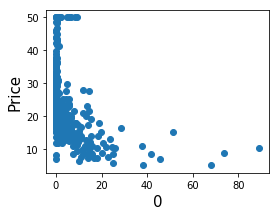

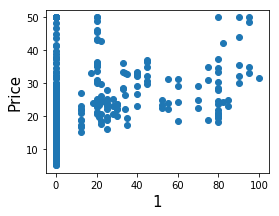

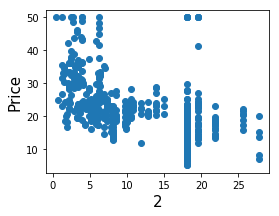

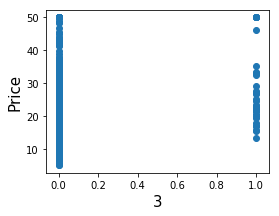

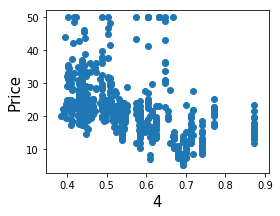

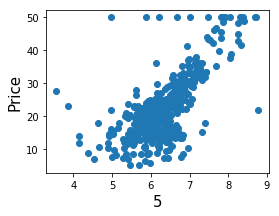

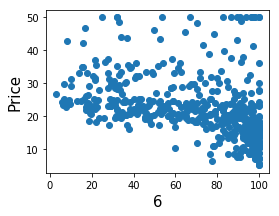

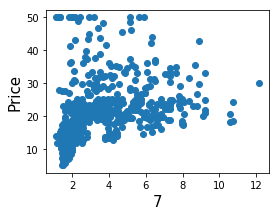

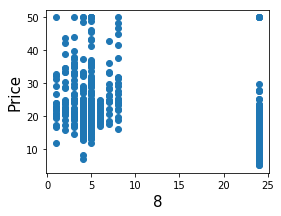

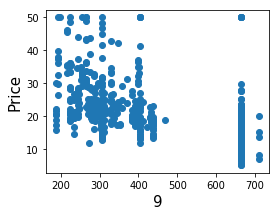

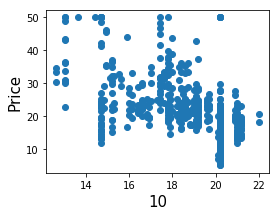

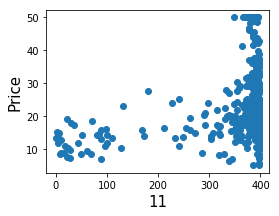

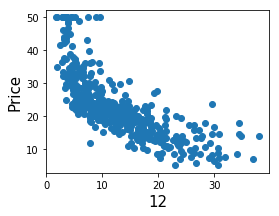

In [32]:
for index, feature_name in enumerate(boston_dataset.feature_names):
    plt.figure(figsize=(4, 3))
    plt.scatter(boston_dataset.data[:, index], boston_dataset.target)
    plt.ylabel('Price', size=15)
    plt.xlabel(index, size=15)
 

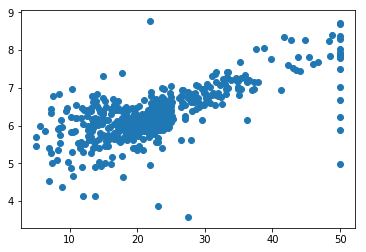

In [34]:
plt.scatter(df["MEDV"], df["RM"])

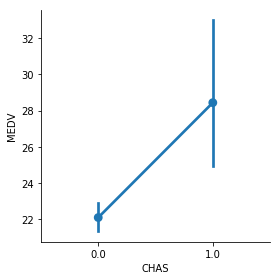

In [35]:
sns.factorplot(x="CHAS",y="MEDV",data=df)

## Referenced Sites
https://medium.com/@haydar_ai/learning-data-science-day-9-linear-regression-on-boston-housing-dataset-cd62a80775ef 
https://gogul.dev/software/regression-example-boston-housing-prices

https://towardsdatascience.com/a-beginners-guide-to-linear-regression-in-python-with-scikit-learn-83a8f7ae2b4f ..
https://realpython.com/linear-regression-in-python/#what-is-regression
https://subscription.packtpub.com/book/programming/9781789804744/1/ch01lvl1sec11/our-first-analysis-the-boston-housing-dataset
https://www.surveysystem.com/correlation.htm. 
https://medium.com/@haydar_ai/learning-data-science-day-9-linear-regression-on-boston-housing-dataset-cd62a80775ef (repeated) 
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html
https://www.kaggle.com/prasadperera/the-boston-housing-dataset
https://statistics.laerd.com/statistical-guides/independent-t-test-statistical-guide.php

In [36]:
sns.boxplot(df[], color=random.choice(colors), orient="v")

SyntaxError: invalid syntax (<ipython-input-36-5a35a67d2513>, line 1)

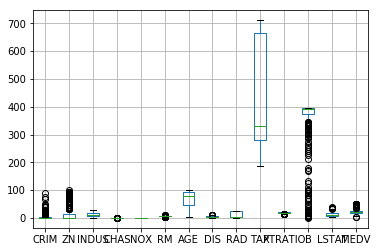

In [37]:
df.boxplot()

***

# Appendices

## Appendix 1 : Histograms of original House Prices Dataset

https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155 come back to this

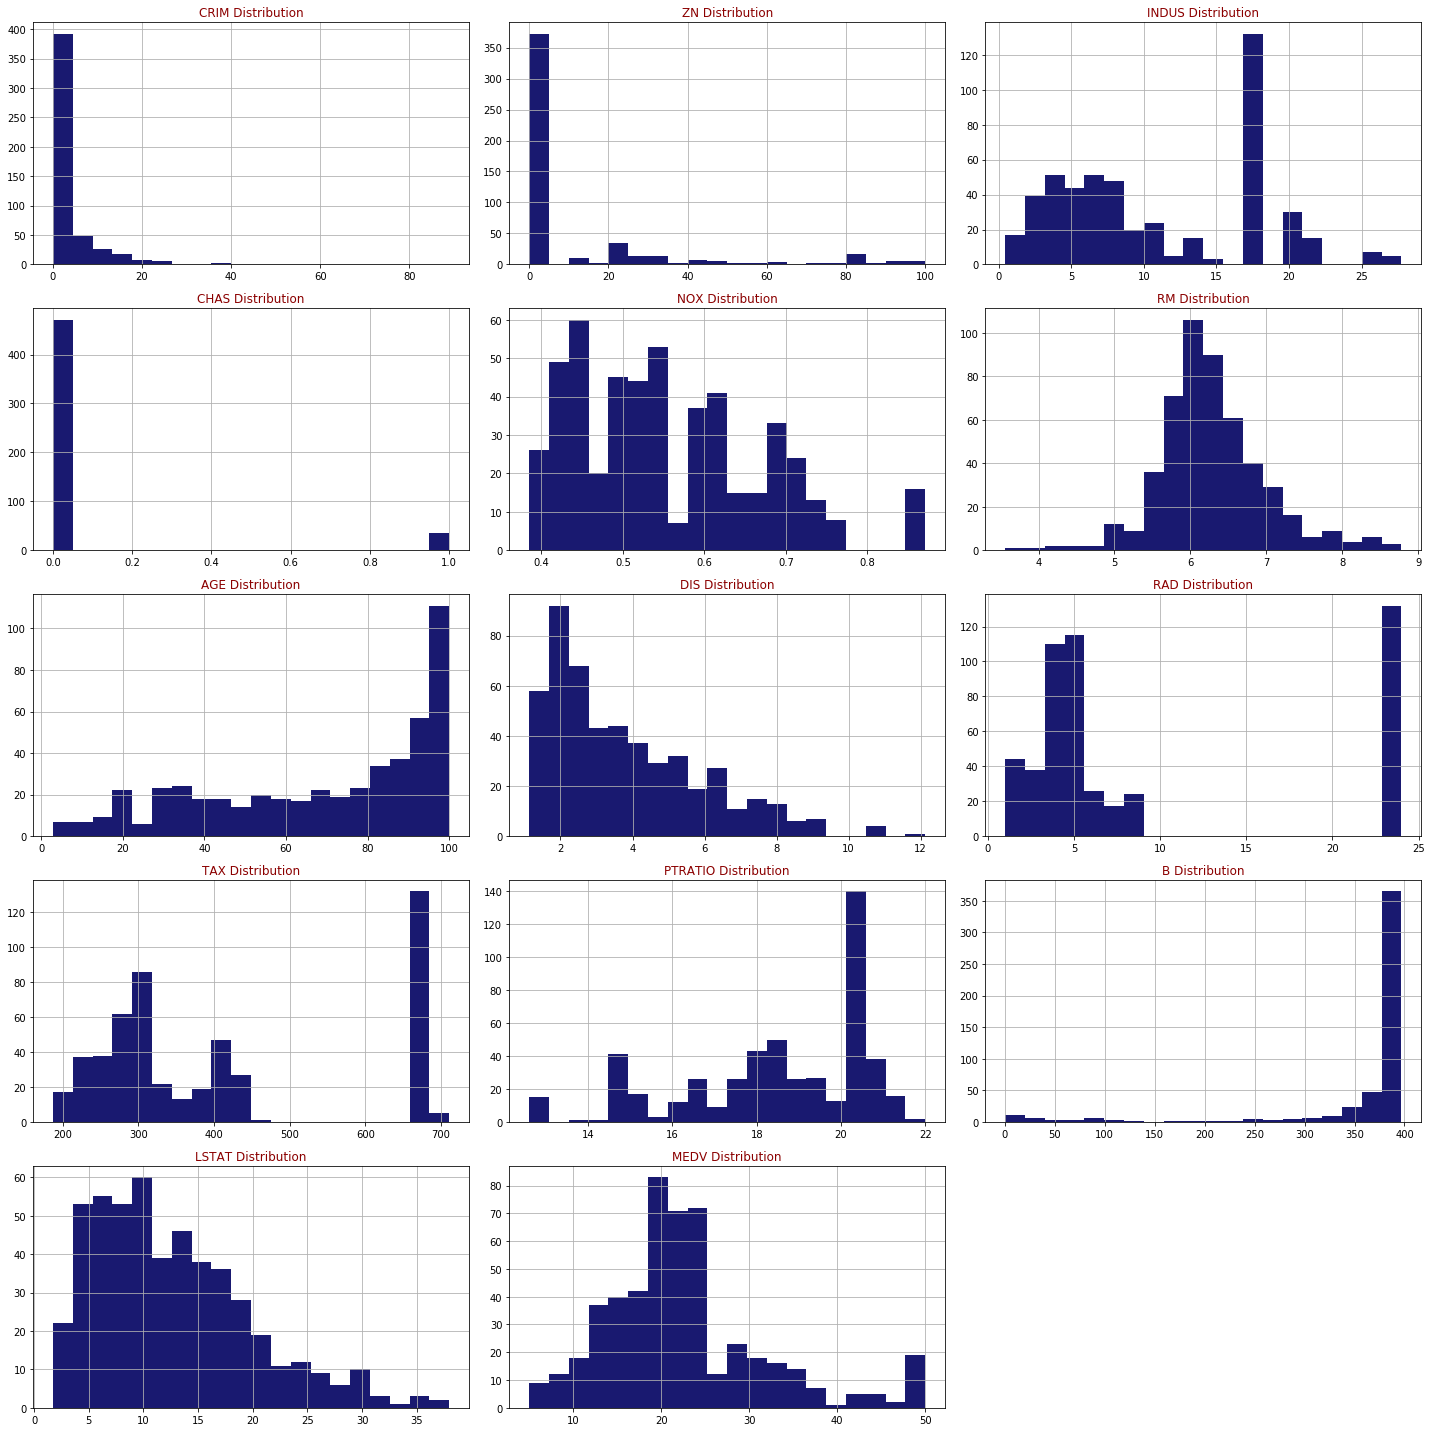

In [38]:
# Code taken from https://medium.com/datadriveninvestor/boston-house-cost-prediction-linear-regression-9a145effe597

def draw_histograms(df, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        df[feature].hist(bins=20,ax=ax,facecolor='midnightblue')
        ax.set_title(feature+" Distribution",color='DarkRed')
        
    fig.tight_layout()  
    plt.show()
draw_histograms(df,df.columns,5,3)

***

## Appendix 2: Scatterplots of Original Inputs measured against MEDV (Price)

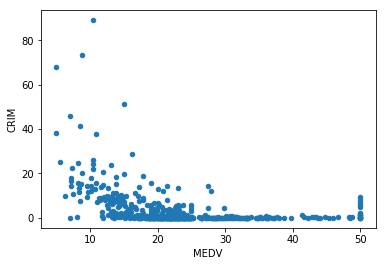

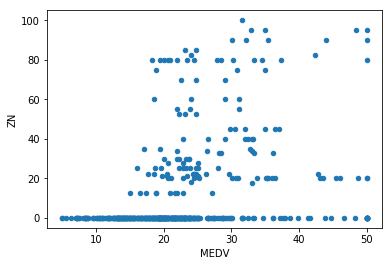

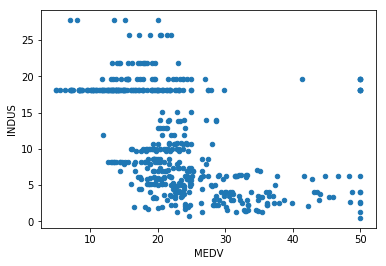

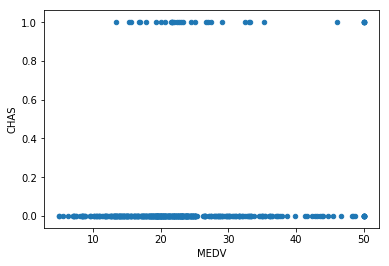

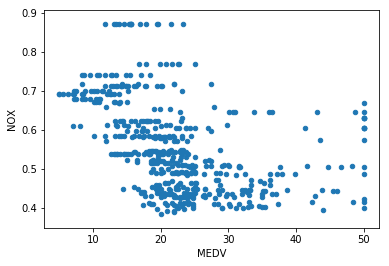

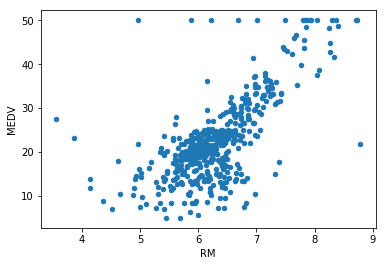

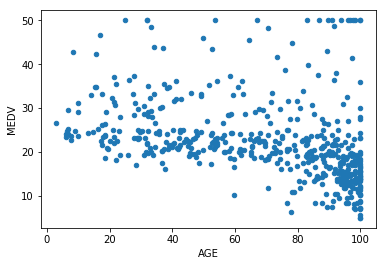

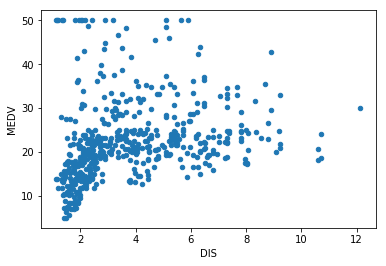

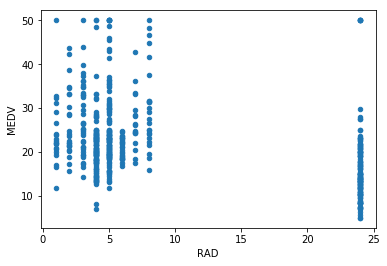

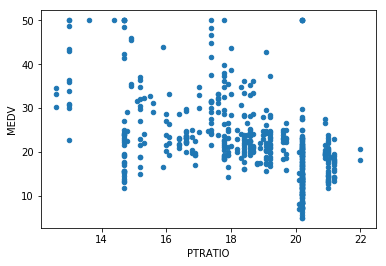

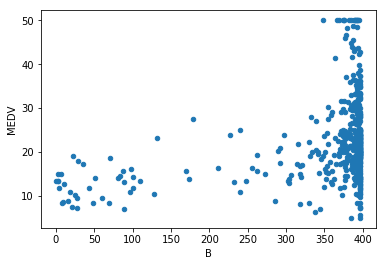

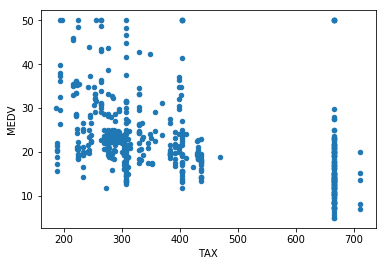

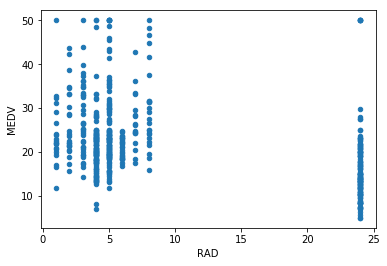

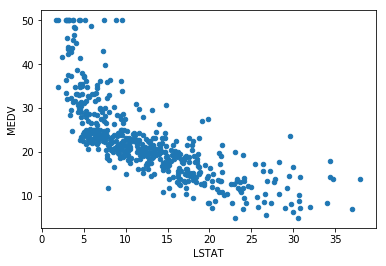

In [165]:
df.plot.scatter(x='MEDV', y='CRIM');
df.plot.scatter(x='MEDV', y='ZN');
df.plot.scatter(x='MEDV', y='INDUS');
df.plot.scatter(x='MEDV', y='CHAS');
df.plot.scatter(x='MEDV', y='NOX');
df.plot.scatter(y='MEDV', x='RM');
df.plot.scatter(y='MEDV', x='AGE');
df.plot.scatter(y='MEDV', x='DIS');
df.plot.scatter(y='MEDV', x='RAD');
df.plot.scatter(y='MEDV', x='PTRATIO');
df.plot.scatter(y='MEDV', x='B');
df.plot.scatter(y='MEDV', x='TAX');
df.plot.scatter(y='MEDV', x='RAD');
df.plot.scatter(y='MEDV', x='LSTAT');



## Keras

Previously through the Descripive and Inferential statistics etc we have hopefully identified the most likely variables that should help in the prediction phase of the exercise. In order to predict the House Prices (MEDV) the following variables are selected: LSTAT (downwards curve), RM almost linear with some outliers, NOX concentrated at lower prices?

Now Keras comes into play as we try to use the actuals as inputs to generate a predictor...

In [141]:
#importing Keras
import keras as kr

In [157]:
# create a new Neural Network
m= kr.models.Sequential()

In [158]:
inputs=df[['RM','LSTAT']]

In [159]:
output=df['MEDV']

In [162]:
m.add(kr.layers.Dense(30,input_dim=2,activation="relu"))
m.add(kr.layers.Dense(20,activation="linear"))
m.add(kr.layers.Dense(1,activation="linear"))

m.compile(loss="mean_squared_error", optimizer='adam')

In [163]:
m.fit(inputs,output,epochs=30, batch_size=10)

Epoch 1/30
506/506 [==============================] - 1s 2ms/step - loss: 80.5927
Epoch 2/30
506/506 [==============================] - 0s 324us/step - loss: 25.8559
Epoch 3/30
506/506 [==============================] - 0s 328us/step - loss: 25.8765
Epoch 4/30
506/506 [==============================] - 0s 360us/step - loss: 25.5867
Epoch 5/30
506/506 [==============================] - 0s 370us/step - loss: 25.7411
Epoch 6/30
506/506 [==============================] - 0s 336us/step - loss: 25.7418
Epoch 7/30
506/506 [==============================] - 0s 397us/step - loss: 26.1168
Epoch 8/30
506/506 [==============================] - 0s 510us/step - loss: 26.5426
Epoch 9/30
506/506 [==============================] - 0s 498us/step - loss: 25.1233
Epoch 10/30
506/506 [==============================] - 0s 389us/step - loss: 25.7458
Epoch 11/30
506/506 [==============================] - 0s 431us/step - loss: 26.4733
Epoch 12/30
506/506 [==============================] - 0s 334us/step - loss:

In [164]:
m.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_82 (Dense)             (None, 10)                30        
_________________________________________________________________
dense_83 (Dense)             (None, 20)                220       
_________________________________________________________________
dense_84 (Dense)             (None, 1)                 21        
_________________________________________________________________
dense_85 (Dense)             (None, 30)                60        
_________________________________________________________________
dense_86 (Dense)             (None, 20)                620       
_________________________________________________________________
dense_87 (Dense)             (None, 1)                 21        
Total params: 972
Trainable params: 972
Non-trainable params: 0
_______________________________________________________

In [90]:
m.predict(inputs)

array([[31.120062 ],
       [24.977385 ],
       [36.97194  ],
       [38.40398  ],
       [33.709354 ],
       [29.719282 ],
       [20.66252  ],
       [16.198723 ],
       [12.845498 ],
       [17.039627 ],
       [16.095713 ],
       [20.004044 ],
       [17.605047 ],
       [23.591019 ],
       [22.696768 ],
       [22.927172 ],
       [24.820578 ],
       [18.845406 ],
       [18.801542 ],
       [20.300714 ],
       [12.246231 ],
       [19.381536 ],
       [16.398    ],
       [14.069173 ],
       [17.30469  ],
       [15.723221 ],
       [17.964422 ],
       [17.089226 ],
       [22.48878  ],
       [23.900946 ],
       [12.377128 ],
       [20.456038 ],
       [12.7568655],
       [14.7552595],
       [14.952362 ],
       [22.430126 ],
       [20.69897  ],
       [22.766594 ],
       [22.22859  ],
       [32.780666 ],
       [40.221516 ],
       [32.608437 ],
       [26.855013 ],
       [25.365868 ],
       [23.124275 ],
       [20.926153 ],
       [18.353516 ],
       [15.84

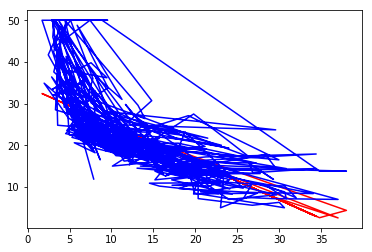

In [80]:
plt.plot(inputs,p,'r-', label='Prediction')
plt.plot(inputs,output,'b-',label='Original')

In [93]:
output.as_matrix()

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [94]:
m.predict(inputs) - output.as_matrix()


array([[  7.12006187,   9.52006187,  -3.57993813, ...,   7.22006187,
          9.12006187,  19.22006187],
       [  0.97738457,   3.37738457,  -9.72261543, ...,   1.07738457,
          2.97738457,  13.07738457],
       [ 12.97193909,  15.37193909,   2.27193909, ...,  13.07193909,
         14.97193909,  25.07193909],
       ...,
       [  7.96687126,  10.36687126,  -2.73312874, ...,   8.06687126,
          9.96687126,  20.06687126],
       [  5.0785656 ,   7.4785656 ,  -5.6214344 , ...,   5.1785656 ,
          7.0785656 ,  17.1785656 ],
       [  0.23691368,   2.63691368, -10.46308632, ...,   0.33691368,
          2.23691368,  12.33691368]])